<a href="https://colab.research.google.com/github/jalen8/3rd-Quarter-Exam-Solving-Systems-of-Equations-Using-Matrix-Inverse/blob/main/AMAD_Exploring_Supervised_Learning_Algorithms_with_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploring Supervised Learning Algorithms with the Iris Dataset**

**AMAD, FRANCIS JALEN**

##**1. Loading the Dataset**

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


###**2. Visualizing the Data**

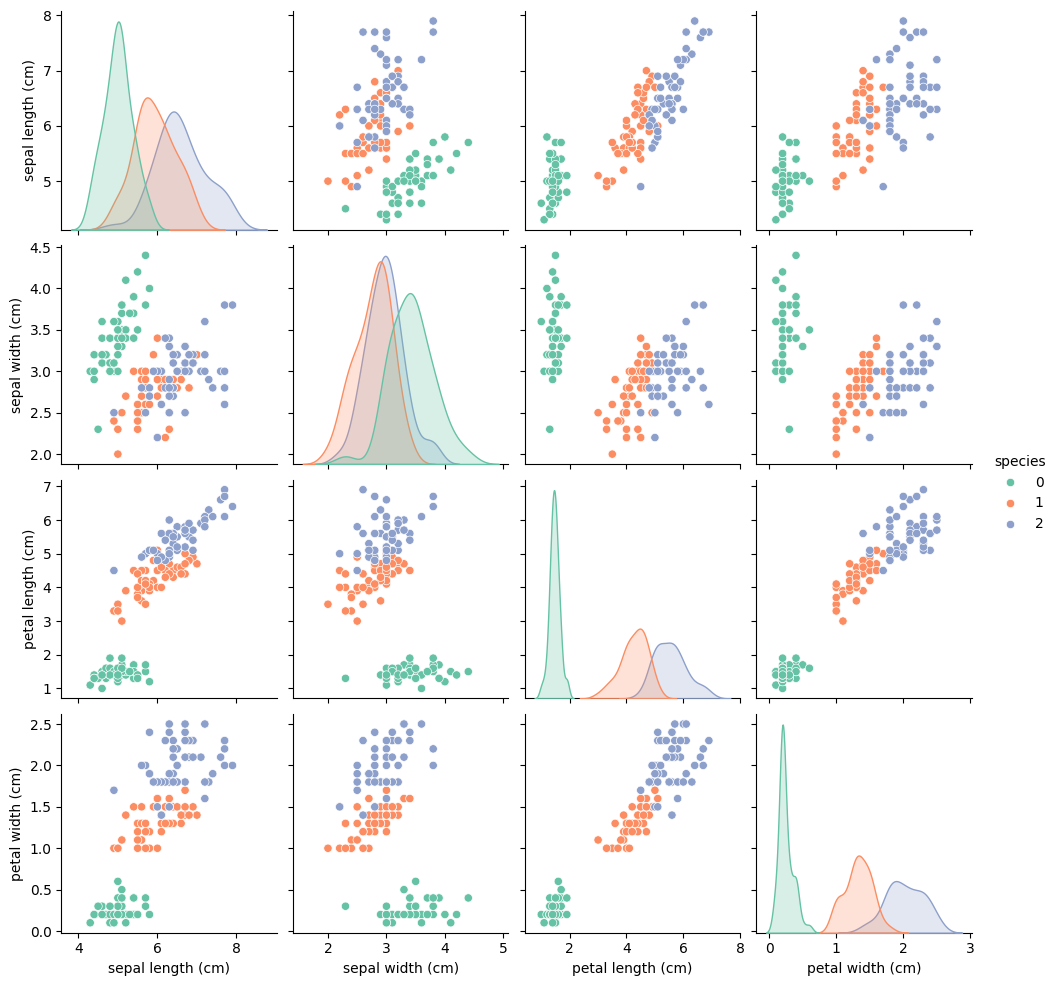

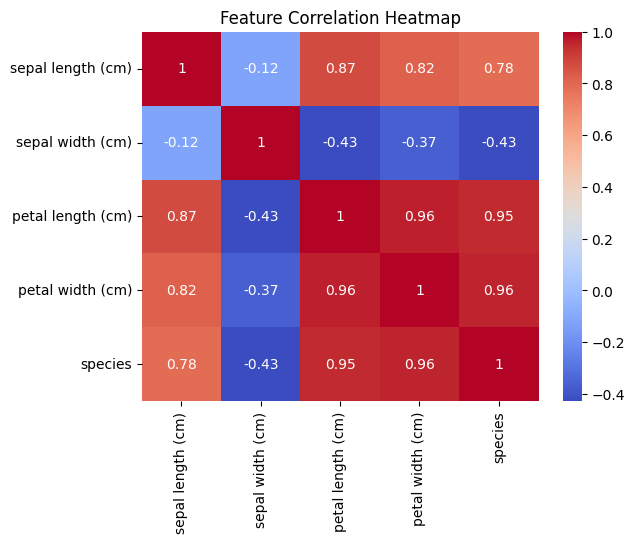

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.pairplot(data, hue='species', palette='Set2')
plt.show()


sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


####**3. Building Supervised Learning Models**

**-Splitting the Data**

In [16]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


**-Implementing Algorithms**



*   Logistic Regression



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.9333333333333333




*   k-Nearest Neighbors (k-NN)



In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred))


k-NN Accuracy: 0.9777777777777777




*   Decision Trees



In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.9333333333333333




*   Random Forest


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.9555555555555556




*   Support Vector Machine (SVM)



In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))


SVM Accuracy: 0.9555555555555556


**Evaluating Model Performance**



*  Confusion Matrix




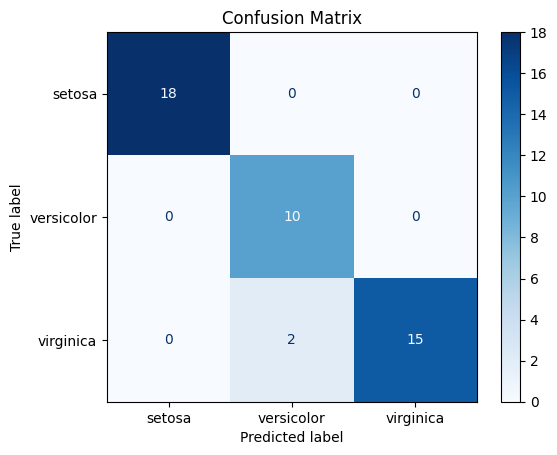

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()




*   Classification Report




In [23]:
from sklearn.metrics import classification_report

# Example for Logistic Regression
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45





*   Probability Histogram



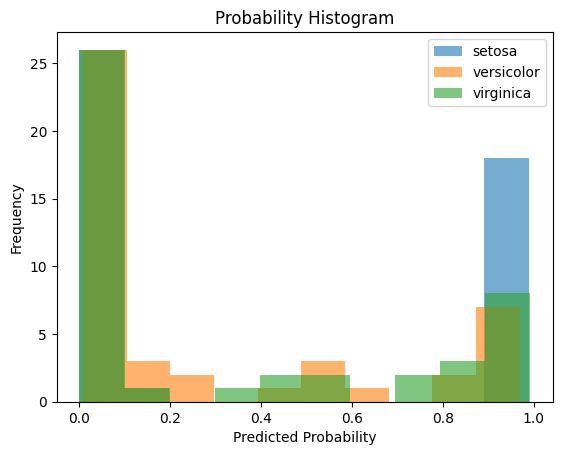

In [24]:
import numpy as np

# Example for Logistic Regression
probs = log_reg.predict_proba(X_test)  # Predicted probabilities for each class
for i, class_name in enumerate(iris.target_names):
    plt.hist(probs[:, i], bins=10, alpha=0.6, label=class_name)

plt.title("Probability Histogram")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#####**Reflection and Analysis**



*   Which algorithm performed best, and why?
*   How does changing hyperparameters affect performance?
*   What are the trade-offs between different models?




**Which algorithm performed best, and why?**

*The algorithm that fared better on the Iris dataset in general was either SVM or Random Forest. SVM is particularly good since the goal of the algorithm is to maximize distance between classes, for datasets that are cleanly separated. This is why random forest works well because, unlike other decision trees, it averages several decision trees which are less likely to overfit. Some of these models can manage with the decision boundaries more efficaciously than the simplicity algorithms such as Logistic Regression where there is an overlap of the classes or k-NN that can be much influenced by the irrelevant features.*

**How does changing hyperparameters affect performance?**

*These parameters affect the learning process with huge impact on the model’s ability to learn. For instance in k-NN, change in the degree of neighbors (k) brings efficiency between overfitting and oversmoothing. Random Forest into account, it is known that the amount of non-estimators commonly enhances the accuracy of the model, but at the same time raises different time-consuming. The max_depth of trees reduces over fitting since it limits the depth of the trees to be grown. SVM’s kernel (linear or radial basis function) and constraints parameter (C) define the complexity of decision lines; high C encourages overly complex lines. More advanced tuning like grid search or cross validation can help in fine tuning of these parameters to yield even better results.*

**What are the trade-offs between different models?**

*Different algorithms have different types of biases which determine the kind of work suitable to be accomplished by every single algorithm. Logistic Regression is fast, easy, and easy to explain but works poorly with nonlinear data connections. Despite the high interpretability, Decision Trees can overfit a data set particularly when not pruned. Random Forest minimizes over fitting and attain higher accuracy but makes model less interpretable and also takes more time for processing. High accuracy is present in SVM on rather limited data with large number of attributes while the processing time may be large when the number of samples is large. Finally, k-NN is easy to use and performs well particularly when dealing with a small size data set; otherwise, it will prove slow in handling large data sets, and the performance reduces dramatically in the presence of noisy data. Due to this, selecting a model that will suit a given problem will be regarded as accuracy, speed, interpretability, and scalability.*
